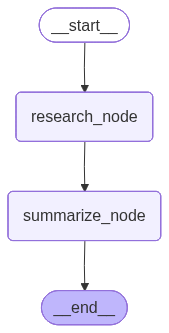

{'query': 'LangGraph', 'result': 'Summarizing info about LangGraph'}


In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


class MyState(TypedDict):
    query: str
    result: str


def research_node(state: MyState) -> MyState:
    state['result'] = f"Searching info about {state['query']}"
    return state


def summarize_node(state: MyState) -> MyState:
    state['result'] = f"Summarizing info about {state['query']}"
    return state


graph = StateGraph(MyState)
graph.add_node('research_node', research_node)
graph.add_node('summarize_node', summarize_node)

graph.add_edge(START, "research_node")
graph.add_edge("research_node", "summarize_node")
graph.add_edge("summarize_node", END)

compiled_graph = graph.compile()
display(compiled_graph)
final_state = compiled_graph.invoke({"query": "LangGraph"})
print(final_state)



# Conditional Edges

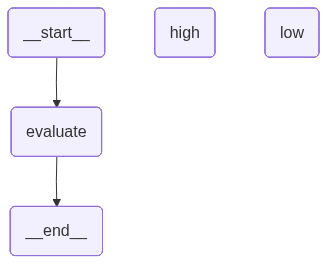

Confidence: 1
Deciding router: high confidence
AI is confident ✅


In [24]:
from typing import TypedDict, Literal
from IPython.display import display, Image


class MyState(TypedDict):
    query: str
    result: str
    confidence: float

# Conditional routing
def confidence_router(state: MyState) -> Literal['high', 'low']:
    if state["confidence"] > 0:
        print("Deciding router: high confidence")
        return "high"
    print("Deciding router: low confidence")
    return "low"

def evaluate_node(state: MyState) -> MyState:
    confidence = len(state["query"]) % 2
    print("Confidence:", confidence)
    state["confidence"] = confidence
    return state

def high_confidence(state: MyState) -> MyState:
    state["result"] = "AI is confident ✅"
    return state

def low_confidence(state: MyState) -> MyState:
    state["result"] = "Send to human for review 🧍"
    return state

# Build graph
graph = StateGraph(MyState)

graph.add_node("evaluate", evaluate_node)
graph.add_node("high", high_confidence)
graph.add_node("low", low_confidence)

graph.add_edge(START, "evaluate")
graph.add_conditional_edges("evaluate", confidence_router)
graph.add_edge("high", END)
graph.add_edge("low", END)

compiled_graph = graph.compile()

# Display graph
display(compiled_graph)

# Invoke graph
final = compiled_graph.invoke({"query": "LangGraph"})
print(final["result"])
